In this code demo we’ll look at how we can implement a Convolutional Neural Network. We will be using keras with tensor flow as the backend.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
%matplotlib inline

In [3]:
# data_dir='E:\Work\Machine Learning Course\Python\Module 5 Neural Networks\Data'
# os.chdir(data_dir)

In [2]:
X_train=pd.read_csv("fashion_train.csv")
y_train=pd.read_csv("fashion_train_labels.csv")
X_test=pd.read_csv("fashion_test.csv")
y_test=pd.read_csv("fashion_test_labels.csv")

Now the dataset that I am using for this demo is similar to the dataset I have been using in the previous demos. As you remember we have a dataset which has images of different fashion accessories as well as their respective labels. In this demo we will build a Convolutional Neural Network classifier which will take an image as an input and try to predict the class to which that image belongs.

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [4]:
print(X_train.head())

   0  1  2  3  4  5  6  7   8   9  ...  774  775  776  777  778  779  780  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  119  114  130   76    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    0    1    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 784 columns]


If you remember X_train contains flattened images. Now each row here is a flattened image and as you remember, to build a Convolutional Neural Network, we will need to supply inputs as images instead of flattened images. We will see in detail how we will do this task programmatically.

Let’s look at first few observations of Y_train. This contains the labels of images and these are the label descriptions.

In [5]:
print(y_train.head())

   0
0  9
1  0
2  0
3  3
4  0


## These labels are

| Label | Description |
|-------|-------------|
| 0     | T-shirt/Top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

Here I am creating a label dictionary which will come in handy later on once I build the model.

In [6]:
## Create a dictionary of labels
label_dic={0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',
           7:'Sneaker',8:'Bag',9:'Ankle Boot'}

here I am converting the dataframe into a numpy array and I am also creating a target matrix. Now if you remember the kind of input that we need to provide to neural networks in keras is slightly different. For a target variable we don’t need a vector of target variable, instead we need an array of target variable

In [7]:
x=np.array(X_train)
y=tf.keras.utils.to_categorical(np.array(y_train),10) 

In [8]:
## Normalize the pixel intensities
x=x/255.0

Here I am making some imports from keras, as you can see from the layers module I am importing the Conv2D. This would help me in adding the convolutional layers inside my neural network architecture. Now you are already familiar with Dense layer. The Flatten layer will be used to flatten the convolutional layers. I will also implement MaxPooling, so I am also importing the MaxPooling2D layer and I am also importing the Dropout layer. Now this is how I will create the architecture of my Convolutional Neural Network. Let’s import these classes first and then we can talk about the configuration of our Convolutional Neural Network.

In [9]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense,Flatten
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

The first hidden layer as you can see is a convolutional layer now and I am using 6 kernels and each kernel is 3 by 3. You can also see that there is a parameter called padding. Now I am saying padding is equal to same. This will make sure that there is no down sampling from my input to this layer. Also another parameter that you can see is input_shape.
Now here I am specifying that I’ll be supplying an image which is 28 pixel by 28 pixel. If you remember our original data has 784 columns. Now these 784 columns are obtained by flattening 28 by 28 images. So here I am specifying that I will be providing not a flattened image but a 28 pixel by 28 pixel image. The 1 here represents that there is only 1 channel in my image. Now if you remember the images that I have are only black and white images. So there is only a grey scale channel that is what is being specified here. Then I am adding a max pooling layer, again a convolutional layer, again a max pooling layer and then I am adding a flattening operation to create fully connected layers. So after I flatten these convolutional layers, I’ll have a fully connected relu layer, followed again by a fully connected relu layer and since I am building a classifier the last layer will be a softmax layer. So let’s run this.

In [10]:
##LeNet model configuration(Original LeNet expects 32*32 input, I have modified the implimentation added droput layer)
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(3,3),padding='same',input_shape=(28,28,1))) ##  "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
model.add(MaxPooling2D(pool_size=(2,2)))  ## kernel size of filter
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='valid')) ## "valid" means no padding.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2,seed=100))##
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

Here I am compiling my model. If you remember wherever we have a classifier, we always use a categorical cross entropy loss

learning_rate: A Tensor, floating point value, or a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.01.

momentum: float hyperparameter >= 0 that accelerates gradient descent in the relevant direction and dampens oscillations. Defaults to 0, i.e., vanilla gradient descent.

nesterov: boolean. Whether to apply Nesterov momentum. Defaults to False.

decay: Keras has a time-based learning rate schedule built in. ... When the decay argument is specified, it will decrease the learning rate from the previous epoch by the given fixed amount

In [11]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Now X if you remember was a numpy array. I am reshaping it and I am reshaping it in this manner where I am saying that I will have 28 by 28 images. How many images as many as there are number of rows in my original matrix and there will be 1 channel in these images.

In [12]:
##Reshaping: nrows,28,28,1 channel (images are greyscale)
x_train=x.reshape(x.shape[0],28,28,1)

So now I am ready to do the training operation for my Convolutional Neural Network. I will supply X_train, now again I am emphasizing here the X_train is not an array of flattened images. It’s an array of shape 28x28. So let’s run this.

Now it will take some time for this training to occur. Convolutional Neural Network takes slightly more time than your Multi Layered Perceptrons to train. So depending upon what is the configuration of your machine, this can take anywhere between one to five minutes to train this model

In [13]:
history=model.fit(x_train,y,epochs=10,batch_size=1000,validation_split=0.20)

Epoch 1/10
48/48 [==============================] - 7s 130ms/step - loss: 1.6156 - accuracy: 0.4333 - val_loss: 0.7857 - val_accuracy: 0.6938
Epoch 2/10
48/48 [==============================] - 6s 129ms/step - loss: 0.7581 - accuracy: 0.7141 - val_loss: 0.6240 - val_accuracy: 0.7659
Epoch 3/10
48/48 [==============================] - 6s 128ms/step - loss: 0.6537 - accuracy: 0.7552 - val_loss: 0.5696 - val_accuracy: 0.7803
Epoch 4/10
48/48 [==============================] - 6s 126ms/step - loss: 0.5963 - accuracy: 0.7766 - val_loss: 0.5312 - val_accuracy: 0.7983
Epoch 5/10
48/48 [==============================] - 7s 137ms/step - loss: 0.5609 - accuracy: 0.7922 - val_loss: 0.5029 - val_accuracy: 0.8192
Epoch 6/10
48/48 [==============================] - 7s 150ms/step - loss: 0.5250 - accuracy: 0.8057 - val_loss: 0.4817 - val_accuracy: 0.8250
Epoch 7/10
48/48 [==============================] - 7s 141ms/step - loss: 0.5029 - accuracy: 0.8150 - val_loss: 0.4674 - val_accuracy: 0.8298
Epoch 

I will use my test data to obtain predictions on it. This is what I am doing here. I am creating a numpy array first on my test matrix, then I am normalizing that matrix, then I am reshaping that matrix.

In [14]:
x_text=np.array(X_test)
x_test=x_text/255.0
x_test=x_test.reshape(x_test.shape[0],28,28,1)

Now let’s take a look at what is the image at the 8th index which will be the ninth row in my test data.

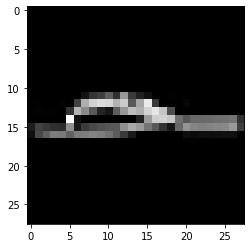

In [15]:
plt.imshow(x_test[8,:,:].reshape(28,28),cmap='gray')

In [16]:
p = model.predict(x_test[8,:,:].reshape(1,28,28,1))
p

array([[5.3413617e-03, 7.9500902e-04, 1.6557856e-03, 3.3939832e-03,
        1.5341009e-03, 8.9695036e-01, 2.3056292e-03, 7.6687276e-02,
        1.0101740e-02, 1.2348979e-03]], dtype=float32)

This is the probability vector that has been returned. Let’s figure out at which index do I have a maximum value.

In [17]:
np.argmax(p)

5

Let's see what the 5th label in the dictionary refers to

In [18]:
label_dic[5]

'Sandal'

In [19]:
y_test.head(10)

,0
0,9
1,2
2,1
3,1
4,6
5,1
6,4
7,6
8,5
9,7


If you remember I have run this Convolutional Neural Network only for 10 epochs and within 10 epochs I have been able to get a validation accuracy of 85 percent.
Now if you remember I had run a Multi Layered Perceptrons for thirty epochs and even after that my Multi Layered Perceptron only was able to achieve an accuracy of 80 to 81 percent. So there is quite an increase in the accuracy just by changing the architecture of a neural network.

Now I can always plot the training and validation accuracy. This is how that curve looks like. I can also plot the training and validation loss.

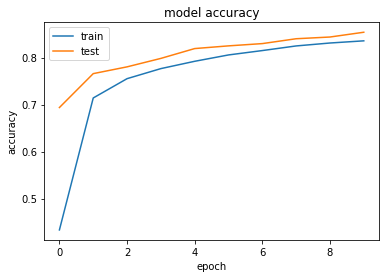

In [20]:
## Check for overfit
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

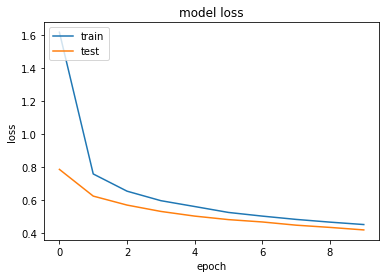

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()